Loan Approval Prediction:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load the dataset
df = pd.read_csv('Loan_approval_dataset.csv')

In [3]:
#Display the first five rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.columns = df.columns.str.strip()


In [5]:
df.shape

(4269, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
df['loan_status'].value_counts(normalize=True) 

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

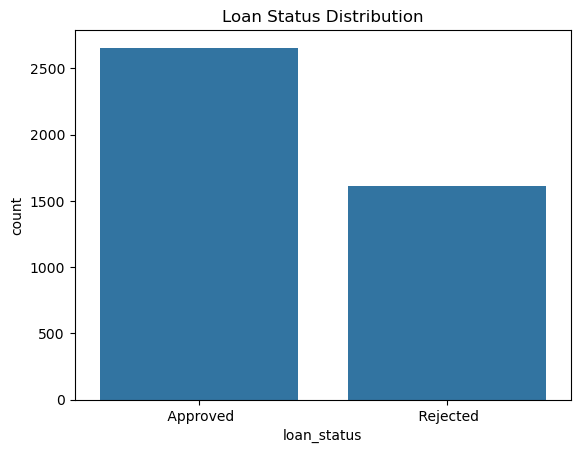

In [12]:
#Target variable distribution
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

Approved loans are more than rejected loans and Data is imbalanced.


In [13]:
#education
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

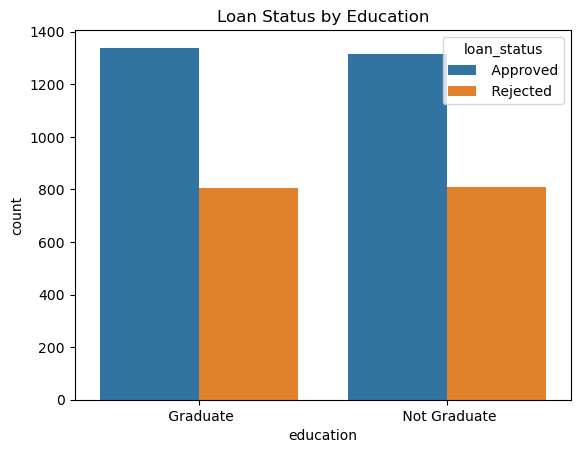

In [14]:
#Education vs loan status
sns.countplot(x='education', hue='loan_status', data=df)
plt.title("Loan Status by Education")
plt.show()

Graduates have a higher approval rate

In [15]:
#self employed vs loan status
pd.crosstab(df['self_employed'], df['loan_status'])

loan_status,Approved,Rejected
self_employed,,
No,1318,801
Yes,1338,812


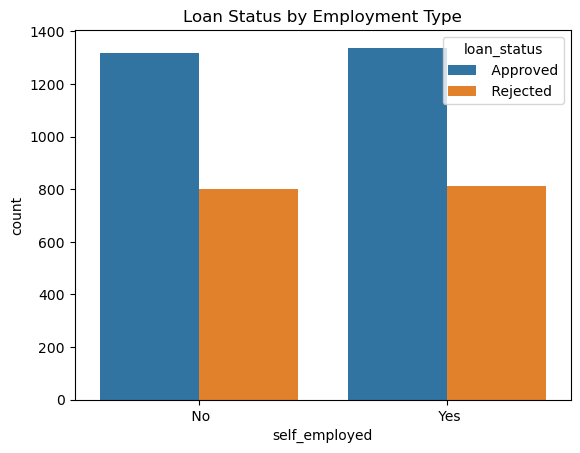

In [16]:
#Education vs loan status
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title("Loan Status by Employment Type")
plt.show()

Non-self-employed applicants have higher approval chances.

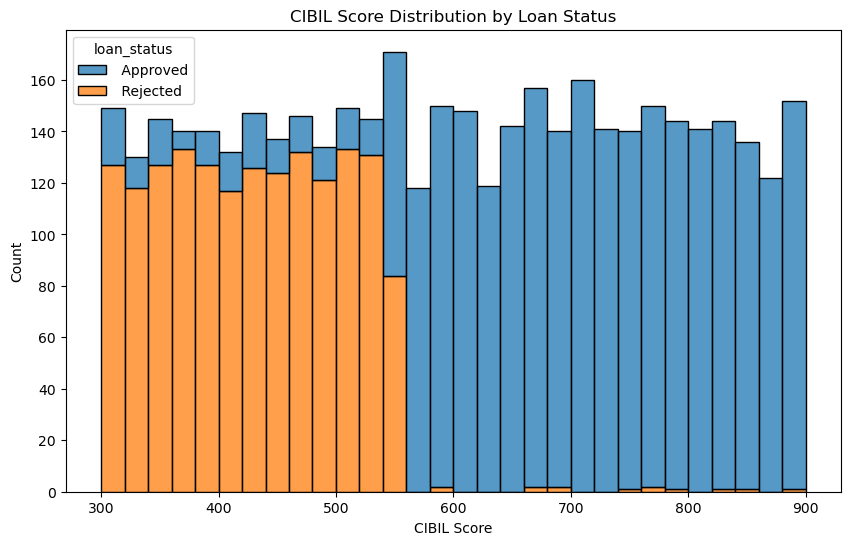

In [17]:
#cibil score distribution by loan status
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='cibil_score', hue='loan_status', multiple='stack', bins=30)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

Approved loans have much higher cibil scores


C:\Users\SWATH\AppData\Local\Temp\ipykernel_17780\199339223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_term', data=df, palette=['#ff9999', '#66b3ff'])


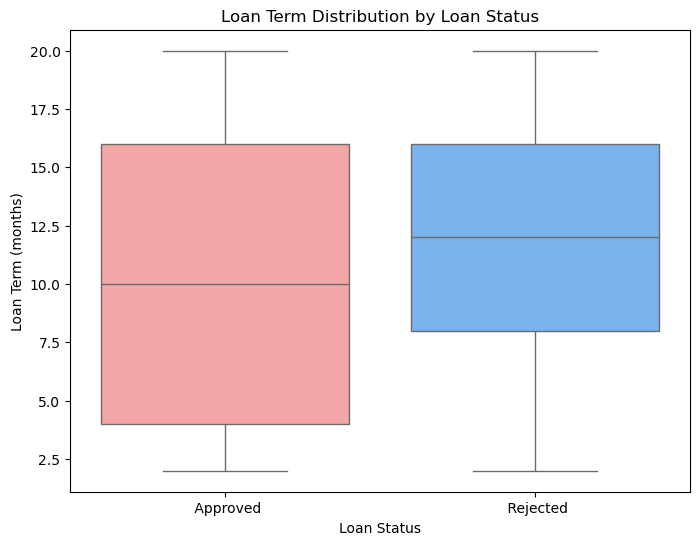

In [18]:
#loan term distribution by loan status
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status', y='loan_term', data=df, palette=['#ff9999', '#66b3ff'])
plt.title('Loan Term Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Term (months)')
plt.show()


1.Most loans have medium to long tenure 
2.longer tenure reduces EMI but increases total risk

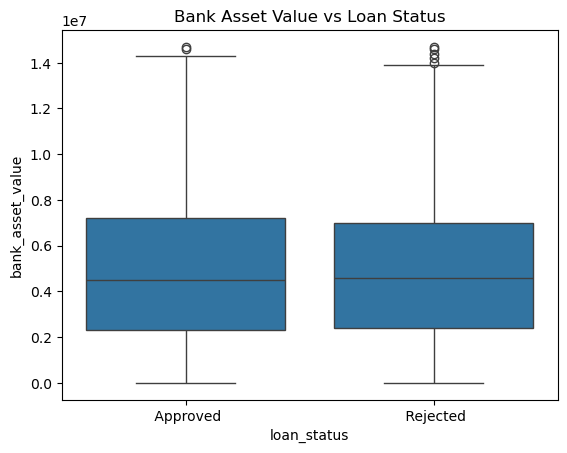

In [19]:
#bank asset value vs loan status
sns.boxplot(x="loan_status", y="bank_asset_value", data=df)
plt.title("Bank Asset Value vs Loan Status")
plt.show()


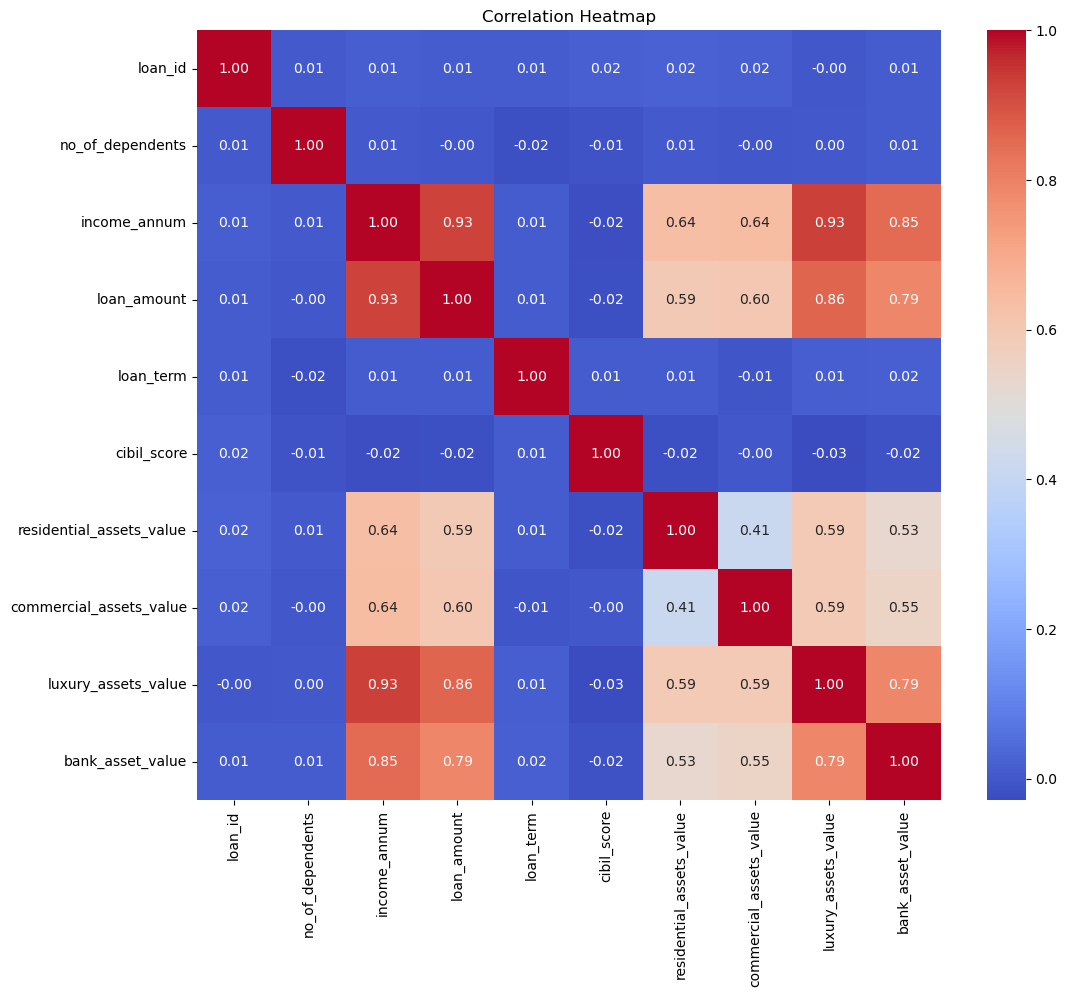

In [20]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\SWATH\AppData\Local\Temp\ipykernel_17780\288953051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amount', data=df, palette=['#ff9999', '#66b3ff'])


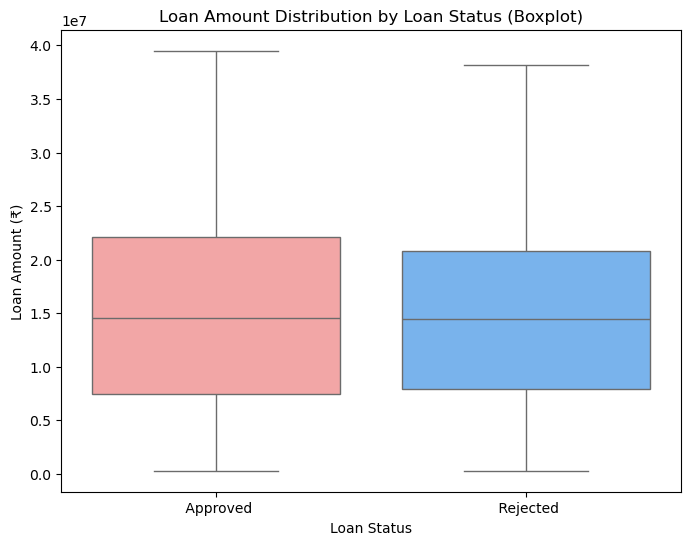

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df, palette=['#ff9999', '#66b3ff'])
plt.title('Loan Amount Distribution by Loan Status (Boxplot)')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount (₹)')
plt.show()

C:\Users\SWATH\AppData\Local\Temp\ipykernel_17780\2866019214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='income_annum', data=df, palette='Set2')


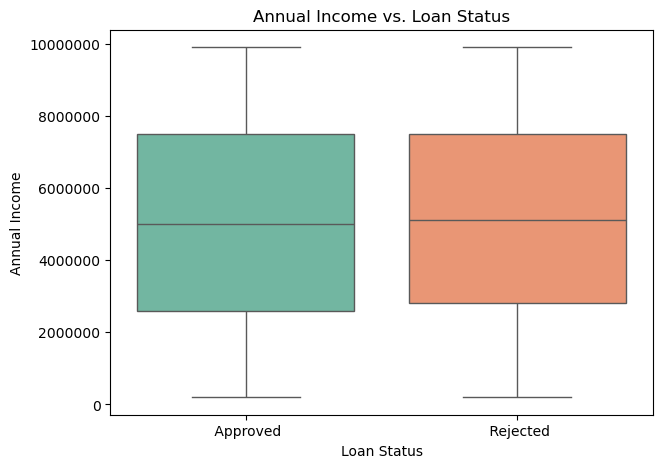

In [22]:
#boxplot for annual income vs loan status
plt.figure(figsize=(7, 5))
sns.boxplot(x='loan_status', y='income_annum', data=df, palette='Set2')
plt.title('Annual Income vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.ticklabel_format(style='plain', axis='y')
plt.show() 

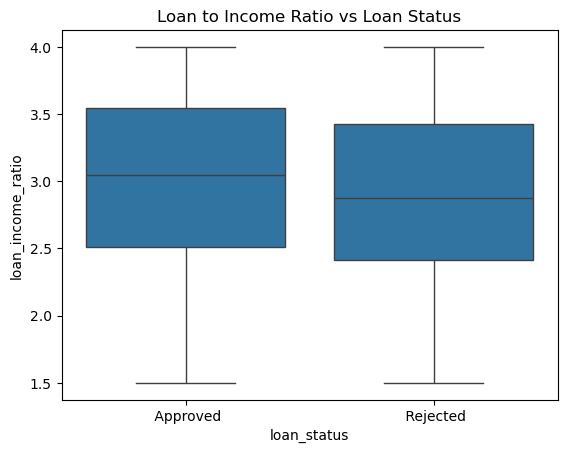

In [23]:
df["loan_income_ratio"] = df["loan_amount"] / df["income_annum"]

sns.boxplot(x="loan_status", y="loan_income_ratio", data=df)
plt.title("Loan to Income Ratio vs Loan Status")
plt.show()


Approved loans generally have a lower loan-to-income ratio than rejected loans, indicating that applicants with better repayment capacity are more likely to be approved.

feature engineering:

In [24]:
df["loan_status"] = (
    df["loan_status"]
    .astype(str)
    .str.strip()
    .str.lower()
)


In [25]:
df['loan_approved'] = df['loan_status'].map({"approved":1,"rejected":0})

In [26]:
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

In [27]:
#create loan to income ratio feature
df["loan_income_ratio"] = df["loan_amount"] / df["income_annum"]

In [28]:
#create total assets feature
df["total_assets"] = (df["bank_asset_value"] + df["commercial_assets_value"]+df["luxury_assets_value"]+df["residential_assets_value"])

In [29]:
#create assets to loan ratio feature
df["assets_loan_ratio"] = df["total_assets"] / df["loan_amount"]

In [30]:
#create income per dependent feature
df["income_per_dependent"] = df["income_annum"] / (df["no_of_dependents"] + 1)  

In [31]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_income_ratio,loan_approved,education_ Not Graduate,self_employed_ Yes,total_assets,assets_loan_ratio,income_per_dependent
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved,3.114583,1,False,False,50700000,1.695652,3.200000e+06
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,rejected,2.975610,0,True,True,17000000,1.393443,4.100000e+06
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,rejected,3.263736,0,False,False,57700000,1.942761,2.275000e+06
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,rejected,3.743902,0,False,False,52700000,1.716612,2.050000e+06
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,rejected,2.469388,0,True,True,55000000,2.272727,1.633333e+06


In [32]:
df['loan_status'].value_counts()

loan_status
approved    2656
rejected    1613
Name: count, dtype: int64

In [33]:
features_to_drop = ['loan_id','loan_status','income_annum', 'bank_asset_value', 'commercial_assets_value', 'luxury_assets_value', 'residential_assets_value']

In [34]:
df_cleaned = df.drop(columns=features_to_drop)

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['loan_amount', 'loan_term', 'cibil_score', 'loan_income_ratio', 'total_assets', 'no_of_dependents','assets_loan_ratio', 'income_per_dependent']
df_cleaned[cols_to_scale] = scaler.fit_transform(df_cleaned[cols_to_scale])   

In [36]:
#Train-test split
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('loan_approved',axis=1)
y = df_cleaned['loan_approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3415, 10)
X_test shape: (854, 10)


In [38]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# 1. Predict the results for the test set
y_pred = model.predict(X_test)

# 2. Check the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")

# 3. View the detailed report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 89.93%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       318
           1       0.91      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



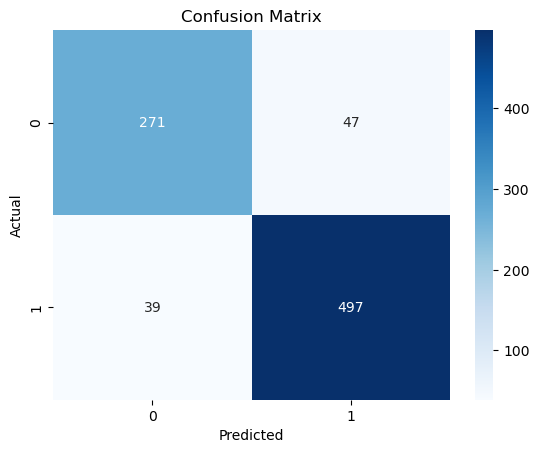

In [40]:


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Model (using 100 trees)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)

# 2. Train the Model
rf_model.fit(X_train, y_train)

# 3. Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       536

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



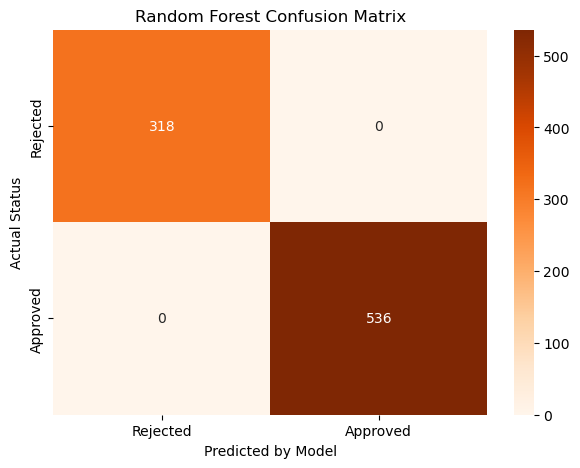

In [42]:


# 1. Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Visualize it using a Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Rejected', 'Approved'], 
            yticklabels=['Rejected', 'Approved'])

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted by Model')
plt.ylabel('Actual Status')
plt.show()

In [43]:
print(X.columns)

Index(['no_of_dependents', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_income_ratio', 'education_ Not Graduate', 'self_employed_ Yes',
       'total_assets', 'assets_loan_ratio', 'income_per_dependent'],
      dtype='object')


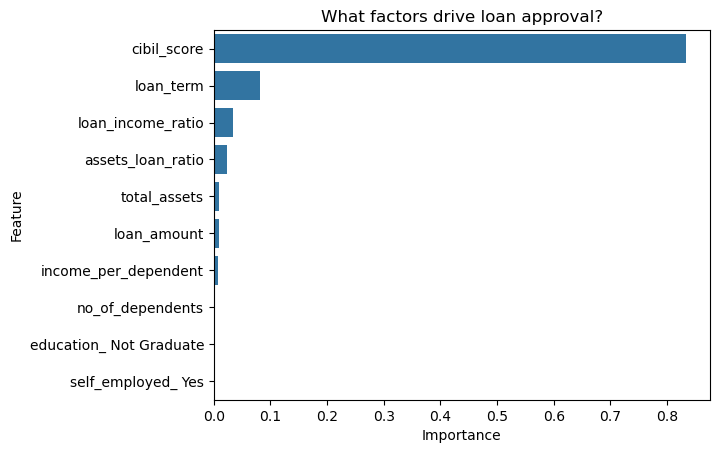

In [44]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('What factors drive loan approval?')
plt.show()

In [50]:
import joblib
# Save the model we trained earlier
joblib.dump(rf_model, 'loan_model.pkl')

['loan_model.pkl']